In [143]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
from datetime import datetime


In [144]:
steamdb_dir = 'data/steamdb'
dfs = dict()
for filename in os.listdir(steamdb_dir):
    f = os.path.join(steamdb_dir, filename)
    if os.path.isfile(f):
        df_name = filename[6:-4] # files manually saved as `chart-game.csv` -> game
        print(f'Adding df: {df_name}')
        dfs[df_name] = pd.read_csv(f, usecols=['DateTime', 'Players'])

Adding df: command-and-conquer
Adding df: stronghold
Adding df: aoe4
Adding df: company-of-heroes
Adding df: aoe3
Adding df: rise-of-nations
Adding df: aoe2-hd
Adding df: aoe2-de
Adding df: total-war-warhammer-ii
Adding df: halo-wars
Adding df: northguard


In [145]:
# Clean data, impute Player counts for missing values
for game, df in dfs.items():
    print(game)
    df.set_index('DateTime')
    # df['Players'] = df['Players'].interpolate(method='linear', inplace=True)
    df.dropna(subset=['Players'], inplace=True)
    # df['Players'] = df['Players'].round()
    df = df.astype({'Players': int})

command-and-conquer
stronghold
aoe4
company-of-heroes
aoe3
rise-of-nations
aoe2-hd
aoe2-de
total-war-warhammer-ii
halo-wars
northguard


In [146]:
# get stats

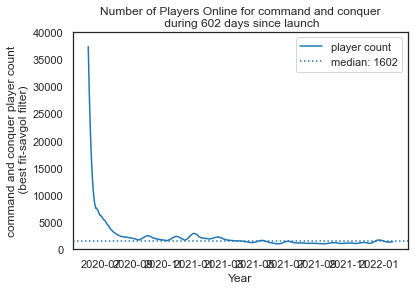

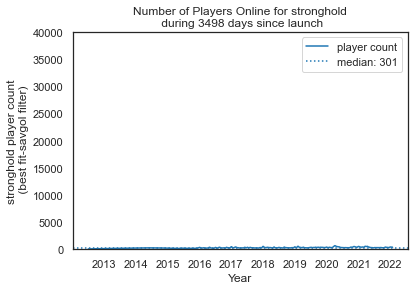

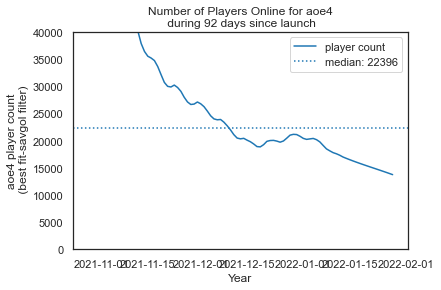

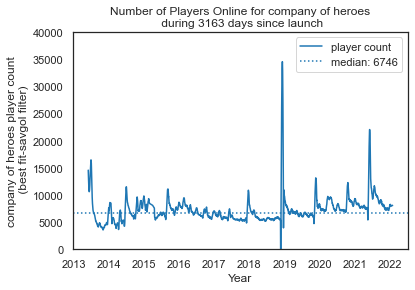

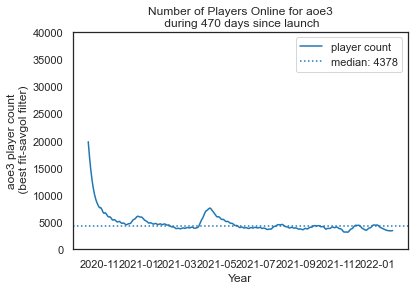

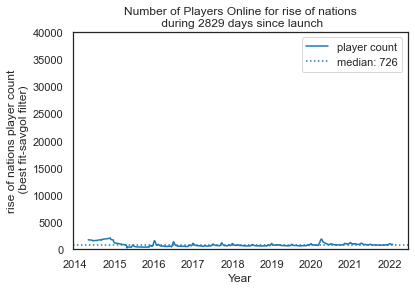

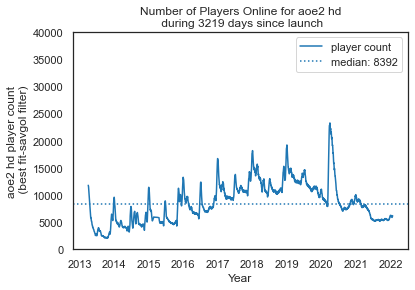

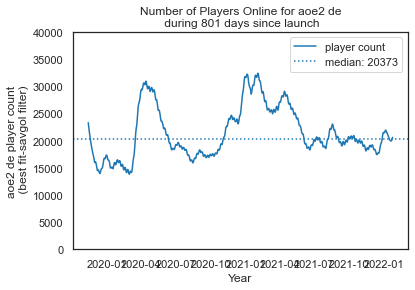

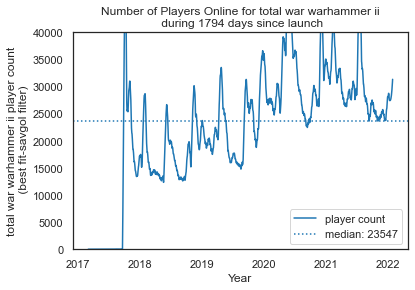

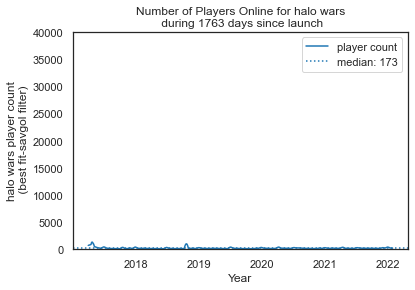

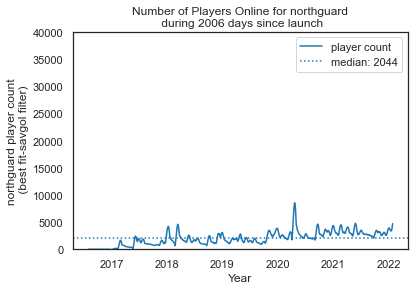

In [147]:

# Plot all games' player counts
for game, df in dfs.items():
    days = pd.to_datetime(df['DateTime'])
    min_ = datetime.strptime(df.DateTime.min(), "%Y-%m-%d %H:%M:%S")
    max_ = datetime.strptime(df.DateTime.max(), "%Y-%m-%d %H:%M:%S")
    delta = (max_ - min_).days
    median_players = int(round(df.Players.median(),0))
    num_players_filtered = df[['Players']].apply(savgol_filter, window_length=31, polyorder=3)

    ax = plt.plot(days, num_players_filtered, label='player count')
    # plt.plot(days, df['Players']) # if we want actual player values
    plt.ylabel(f'{game.replace("-", " ")} player count\n (best fit-savgol filter)')
    plt.xlabel('Year')
    plt.axhline(median_players, linestyle=":", label=f"median: {median_players}")
    plt.title(f'Number of Players Online for {game.replace("-", " ")}\n '
              f'during {delta} days since launch')
    plt.legend()
    axes = plt.gca()
    axes.set_ylim([0,40000])

    plt.show()


In [61]:
# dfs.get('command-and-conquer')

,DateTime,Players
1,2020-06-05 00:00:00,42587.0
2,2020-06-06 00:00:00,32436.0
3,2020-06-07 00:00:00,29218.0
4,2020-06-08 00:00:00,22053.0
5,2020-06-09 00:00:00,18938.0
...,...,...
599,2022-01-24 00:00:00,1298.0
600,2022-01-25 00:00:00,1220.0
601,2022-01-26 00:00:00,1210.0
602,2022-01-27 00:00:00,1241.0


In [19]:
# dfs['stronghold']

,DateTime,Players
0,2001-10-19 00:00:00,NaN
1,2012-07-01 00:00:00,86.0
2,2012-07-02 00:00:00,NaN
3,2012-07-03 00:00:00,NaN
4,2012-07-04 00:00:00,NaN
...,...,...
3495,2022-01-24 00:00:00,397.0
3496,2022-01-25 00:00:00,362.0
3497,2022-01-26 00:00:00,366.0
3498,2022-01-27 00:00:00,356.0
